### Library and Data Import

In [31]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [32]:
# Data Import
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Data Overview

In [33]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [65]:
# Drop non-predictors
df.drop(['Booking_ID'],axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [72]:
# Dimensions: 36275 observations and 19 variables
df.shape

(36275, 19)

In [73]:
# No null values :) 
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [105]:
# Show value counts---possibly bin into three categories (0, 1-3, 5+)
df['no_of_previous_cancellations'].value_counts()

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [107]:
# Show value counts---possibly bin into categories
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [75]:
# Show distribution of numerical variables
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [76]:
# Data spans two years (2017-2018)
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [77]:
# Show value counts for month -- possible feature engineering for seasonality 
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

In [78]:
# Distribution of outcome variable -- Class imbalance, needs to be addressed in training set
print(df['booking_status'].value_counts())
print(df['booking_status'].value_counts()/len(df))

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64


Text(0, 0.5, 'Count')

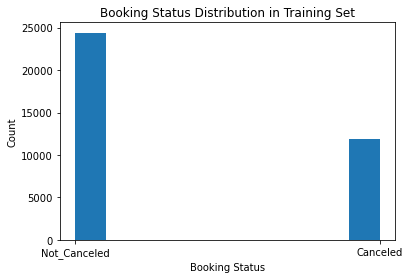

In [79]:
# Booking status distribution
plt.hist(df['booking_status'])
plt.title('Booking Status Distribution in Training Set')
plt.xlabel('Booking Status')
plt.ylabel('Count')

In [85]:
# Separate numerical and categorical predictors
df_num = df[['no_of_adults',
             'no_of_children',
             'no_of_weekend_nights',
             'no_of_week_nights',
             'required_car_parking_space',
             'lead_time',
             'no_of_previous_cancellations',                #maybe bin this
             'no_of_previous_bookings_not_canceled',        #maybe bin this
             'avg_price_per_room',
             'no_of_special_requests',]] 

df_cat = df[['type_of_meal_plan',
             'room_type_reserved',
             'market_segment_type',
             'repeated_guest']]

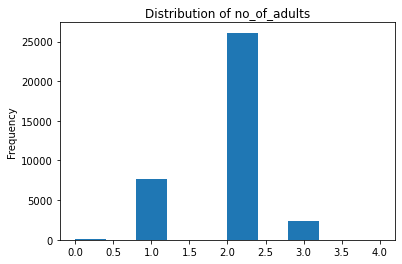

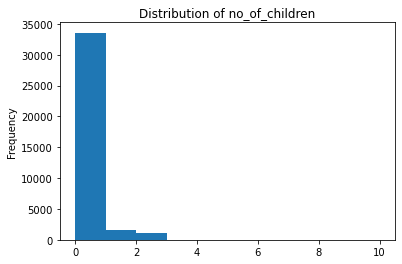

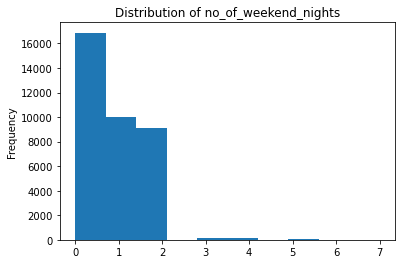

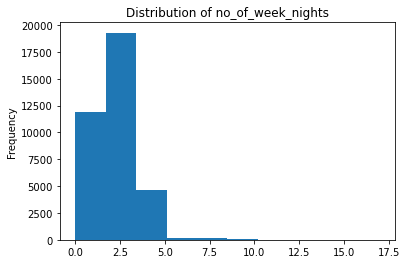

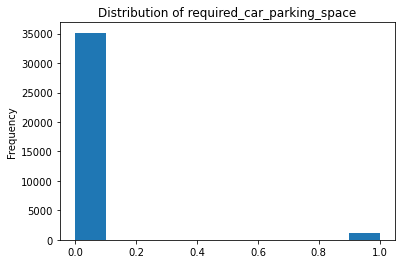

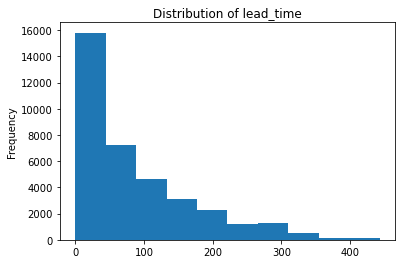

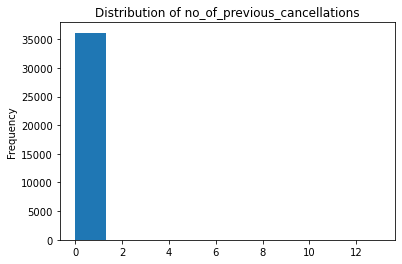

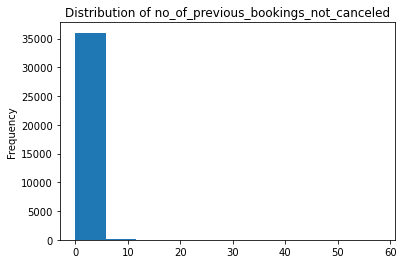

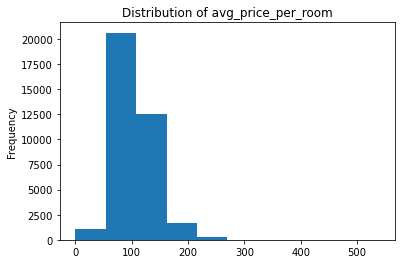

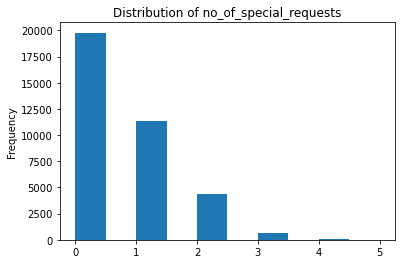

In [98]:
for column in df_num.columns:
    plt.hist(df_num[column])
    plt.title(f"Distribution of {column}")
    plt.ylabel("Frequency")
    plt.show()

In [102]:
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    print(cross_tab)
    print("\n")

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 2              228           464
Room_Type 3                2             5
Room_Type 4             2069          3988
Room_Type 5               72           193
Room_Type 6              406           560
Room_Type 7               36           122


booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation                   37            88
Complementary               0           391
Corporate                 220          1797
Offline                  3153          7375
Online                   8475         14739


booking_status  Canceled  Not_Canceled
repeated

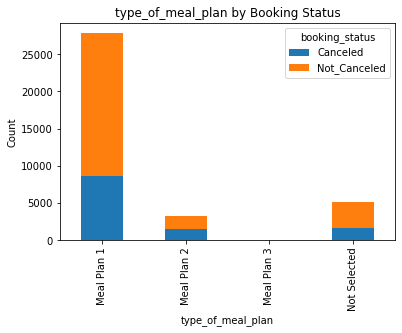

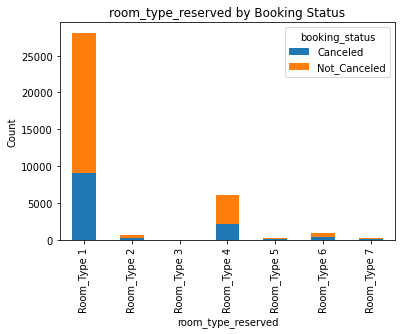

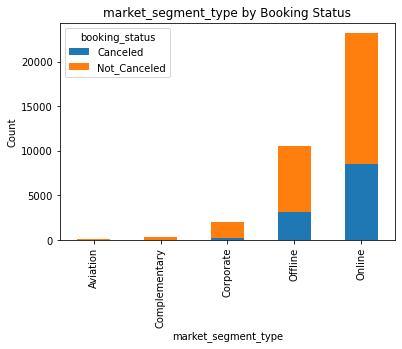

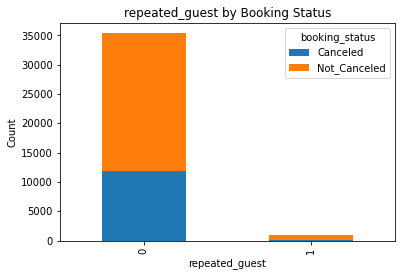

In [103]:
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    cross_tab.plot(kind='bar', stacked=True)
    plt.title(f"{column} by Booking Status")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### Data Split

#### Split data into 80% training and 20% test

In [81]:
train,test=train_test_split(df,test_size=.20, random_state=1)
print("Training dimensions:", train.shape)
print("Testing dimensions:", test.shape)

Training dimensions: (29020, 19)
Testing dimensions: (7255, 19)


In [82]:
trainX = train.drop(['booking_status'], axis=1)
trainY = train['booking_status']

testX = test.drop(['booking_status'], axis=1)
testY = test['booking_status']

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(29020, 18)
(29020,)
(7255, 18)
(7255,)


In [83]:
trainY.value_counts()

Not_Canceled    19483
Canceled         9537
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

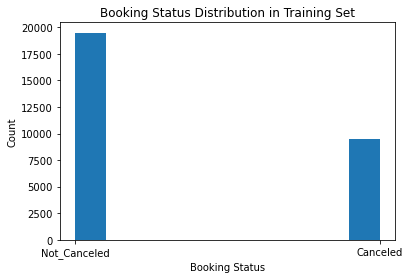

In [108]:
# Show distribution of outcome variable in training set -- class imbalance needs to be addressed, discuss over/undersampling
plt.hist(trainY)
plt.title('Booking Status Distribution in Training Set')
plt.xlabel('Booking Status')
plt.ylabel('Count')

In [104]:
# VIVIAN - WIP 

#df['day']=df['arrival_date'].copy()
#df['month']=df['arrival_month'].copy()
#df['year']=df['arrival_year'].copy()
#df['full_arrival_date']=pd.to_datetime(df[['year','month','day']],format='%Y-%M-%D',errors='coerce')